## U/t sweep

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
colors = ['salmon','dodgerblue','mediumseagreen']
colors = ['#FFA0A0','#1e90ff','#3cb371','#966fd6','#F0B365','#666666','#FEDD00']
colors_light = ['#FFEDED','#6BDDFF','#89FFBE','#ece6ff','#f7ecde','#eeeeee','#fef7e1']

In [3]:
# Load exact data
data_ED = np.loadtxt("/Users/ecasiano/Desktop/PaperData/PaperData/EDSweep/spatEE_gs_16_16_08_+0.500_+100.000_141.dat")
S2_ED = data_ED[:,4]
U_ED = data_ED[:,0]

In [4]:
# Simulation data for β=1.0
data = np.loadtxt('../ProcessedData/1D_16_16_8_Us_1.000000_1.000000_10000_S2.dat')
U = data[:,0]
S2_beta1 = data[:,1]
S2_beta1_err= data[:,2]

In [5]:
# Simulation data for β=2.0
data = np.loadtxt('../ProcessedData/1D_16_16_8_Us_1.000000_2.000000_10001_S2.dat')
S2_beta2 = data[:,1]
S2_beta2_err= data[:,2]

In [6]:
# Simulation data for β=4.0
data = np.loadtxt('../ProcessedData/1D_16_16_8_Us_1.000000_4.000000_10001_S2.dat')
S2_beta4 = data[:,1]
S2_beta4_err= data[:,2]

In [7]:
# Simulation data for β=8.0
data = np.loadtxt('../ProcessedData/1D_16_16_8_Us_1.000000_8.000000_10001_S2.dat')
S2_beta8 = data[:,1]
S2_beta8_err= data[:,2]

In [8]:
!cat ../ProcessedData/1D_16_16_8_Us_1.000000_8.000000_10001_S2.dat

# BH Parameters: L=16,N=16,D=1,l=8,t=1.000000,beta=8.000000,bin_size=10001 
#  U               <S2>               StdErr.
0.5000000000000000 1.6166652908188335 0.0054644941986333
0.7300000000000000 1.5729683778873396 0.0053154970182364
1.0658000000000001 1.5048923819878186 0.0045909880174979
1.5561000000000000 1.4425924486601531 0.0047244326001765
2.2719999999999998 1.3503146349343975 0.0052803303585076
3.2999999999999998 1.2300436875495162 0.0044252949848725
4.8430999999999997 0.8783212375568124 0.0018856581463575
7.0711000000000004 0.3678695266771143 0.0017506911924556
10.3239000000000001 0.1598020958960922 0.0004469354765875
16.6666670000000003 0.0591341816086998 0.0003058366356457
22.0071000000000012 0.0302951023269563 0.0030878263480720
32.1308000000000007 0.0159160119947590 0.0006528218367851
46.9117000000000033 0.0072147989663754 0.0001534351419565
68.4920999999999935 0.0029188372705926 0.0003763142417304
100.0000000000000000 0.0018869707092078 0.0001174088302598


In [9]:
# Extrapolated data for β large
data = np.loadtxt('../ProcessedData/1D_16_16_8_Us_1.000000_extrapolations_10001_S2.dat')
S2s_extrapolated = data[:,1]
S2s_extrapolated_err = data[:,2]

In [10]:
# N=256 data
U = np.array([0.500000,0.730000,1.065800,1.556100,2.272000,3.300000,4.843100,7.071100,10.323900,16.666667, 22.007100, 32.130800,46.911700,68.492100,100.000000])

# Simulation extrapolated values for β -> \infty
data = np.loadtxt('../ProcessedData/1D_256_256_128_Us_1.000000_extrapolations_10001_S2.dat')
S2s_extrapolated_N256 = data[:,1]
S2s_extrapolated_err_N256 = data[:,2]


In [11]:
len(S2s_extrapolated_N256),len(U)

(15, 15)

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


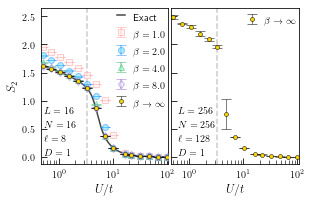

In [12]:
with plt.style.context('../IOP_large.mplstyle'):

    # Plot exact data points
    fig,ax = plt.subplots(1,2,sharey=True)
    ax1=ax[0]
    ax2=ax[1]
    
    ax1.set_xscale("log")
    
    # Plot exact results
    ax1.plot(U_ED,S2_ED,'-k',zorder=-5,label="Exact",color="#444444",mfc="None")
    ax1.set_xlabel(r"$U/t$")
    ax1.set_ylabel(r"$S_2$")
    ax1.axvline(3.3,zorder=-6,color="#cccccc",ls="--")
    # ax1.tick_params(direction='in') # not working in x log scale


    # Plot simulation data for β=1.0
    ax1.errorbar(U,S2_beta1, yerr=S2_beta1_err, fmt='.', capsize=5,color=colors[0],
               mfc=colors_light[0],label=r"$\beta=1.0$",marker='s',zorder=1,alpha=0.50);

    # Plot simulation data for β=2.0
    ax1.errorbar(U,S2_beta2, yerr=S2_beta2_err, fmt='.', capsize=5,color=colors[1],
               mfc=colors_light[1],label=r"$\beta=2.0$",marker='o',zorder=2,alpha=0.50);

    # Plot simulation data for β=4.0
    ax1.errorbar(U,S2_beta4, yerr=S2_beta4_err, fmt='.', capsize=5,color=colors[2],
               mfc=colors_light[2],label=r"$\beta=4.0$",marker='^',zorder=3,alpha=0.50);

    # Plot simulation data for β=8.0
    ax1.errorbar(U,S2_beta8, yerr=S2_beta8_err, fmt='.', capsize=5,color=colors[3],
               mfc=colors_light[3],label=r"$\beta=8.0$",marker='d',zorder=4,alpha=0.50)
    
    # Plot simulation data for β=large extrapolation
    ax1.errorbar(U[0:],S2s_extrapolated, yerr=S2s_extrapolated_err, fmt='.', capsize=5,
               label=r"$\beta\to\infty$",marker=".",zorder=5,color='k',
                mfc='gold',ms=8,elinewidth=0.5,mew=0.5)
    

    # # Set plot limits
    ax1.set_xlim(np.min(U_ED)*0.92,np.max(U_ED)*1.08)
    
    # Set tick parameters
    ax1.tick_params(direction='in',which='both')
    
    # Annotate system information
    ax1.annotate(r"$L=16$",(0.11+0.03,0.26+0.18),
                xycoords='figure fraction',fontsize=10)
    ax1.annotate(r"$N=16$",(0.11+0.03,0.26+0.11),
                xycoords='figure fraction',fontsize=10)
    ax1.annotate(r"$\ell=8$",(0.11+0.03,0.26+0.04),
                xycoords='figure fraction',fontsize=10)
    ax1.annotate(r"$D=1$",(0.11+0.03,0.26-0.03),
                xycoords='figure fraction',fontsize=10)
    
    # Set legend
    ax1.legend()
    
    #Legend
    lgnd = ax1.legend(loc=(0.57,0.28+0.05), fontsize=10, handlelength=0.8,handleheight=1.5,title=r'',frameon=False)
    lgnd.get_title().set_fontsize(10)
    lgnd.get_title().set_position((2.13,-1))
    
    #Legend
#     lgnd = plt.legend(loc=(0.0,0.0), fontsize=10, handlelength=0,handleheight=1.5,title=r'',frameon=False)
#     lgnd.get_title().set_fontsize(10)
#     lgnd.get_title().set_position((2.13,-1))
    
    # N=256 sweep
    
    ax2.set_xscale("log")
    ax2.set_xlabel(r"$U/t$")
    ax2.set_ylabel(r"")
    ax2.axvline(3.3,zorder=-6,color="#cccccc",ls="--")

    # ---------- Bottom Plot ------------- #
    # Plot simulation data for β=large extrapolation
    ax2.errorbar(U,S2s_extrapolated_N256, yerr=S2s_extrapolated_err_N256, fmt='.', capsize=5,
               label=r"$\beta\to\infty$",marker=".",zorder=5,color='k',
                mfc='gold',ms=8,mew=0.5,elinewidth=0.5)

    # # Set plot limits
    ax2.set_xlim(np.min(U)*0.92,np.max(U)*1.08)
    # ax2.set_ylim(np.min(S2_beta4)*0.00,np.max(S2_beta1)*1.05);
    
    # Set tick parameters
    ax2.tick_params(direction='in',which='both')
    
    # Adjust vertical space between subplots
    fig.subplots_adjust(wspace=0.023)
    
    # Annotate system information
    ax2.annotate(r"$L=256$",(0.55+0.02,0.26+0.18),
                xycoords='figure fraction',fontsize=10)
    ax2.annotate(r"$N=256$",(0.55+0.02,0.26+0.11),
                xycoords='figure fraction',fontsize=10)
    ax2.annotate(r"$\ell=128$",(0.55+0.02,0.26+0.04),
                xycoords='figure fraction',fontsize=10)
    ax2.annotate(r"$D=1$",(0.55+0.02,0.26-0.03),
                xycoords='figure fraction',fontsize=10)
    
    # Set legend
    ax2.legend();

    #Legend
    lgnd = ax2.legend(loc=(0.57,0.81+0.05), fontsize=10, handlelength=0.8,handleheight=1.5,title=r'',frameon=False)
    lgnd.get_title().set_fontsize(10)
#     lgnd.get_title().set_position((2.13,-1))

    # Save figure
    plt.savefig("../figures/interactionStrengthSweep_N16N256.pdf",dpi=300)
    plt.savefig("../figures/interactionStrengthSweep_N16N256.svg",dpi=300)
    
    # Save to paper repo
    plt.savefig("/Users/ecasiano/Desktop/papers-latticepigs/Figures/interactionStrengthSweep_N16N256.pdf",dpi=400)
    plt.savefig("/Users/ecasiano/Desktop/papers-latticepigs/Figures/interactionStrengthSweep_N16N256.svg",dpi=400)

In [13]:
# Compare extrapolation with exact values

In [14]:
data_ED = np.loadtxt("/Users/ecasiano/Desktop/PaperData/PaperData/EDSweep/spatEE_gs_16_16_08.dat")
S2_ED = data_ED[:,4]
U_ED = data_ED[:,0]

In [15]:
# Test extrapolation for N=16

S2_ED = data_ED[:,4][0:6]
S2s_extrapolated = np.array([1.6203046051671894, 1.563381907027884, 1.505657820410446, 1.4375845024948415, 1.3511187020721573, 1.2248893747838085])
S2s_extrapolated_err = np.array([0.004851857569332986, 0.0029968310575077092, 0.0027976247959600985, 0.002380777626535738, 0.003446337868204126, 0.0022369830087609773])
print("U/t        S2 (exact)  S2 (extrapolated)  σ            (N=16)")
for i,u in enumerate(U[0:6]):
    rel_err = np.abs((S2s_extrapolated[i]-S2_ED[i])/S2_ED[i])
    print(f"{u:0.6f}   {S2_ED[i]:0.4f}      {S2s_extrapolated[i]:0.4f} +/- {S2s_extrapolated_err[i]:0.4f}  {np.abs(S2s_extrapolated[i]-S2_ED[i])/S2s_extrapolated_err[i]:0.4f}σ")




U/t        S2 (exact)  S2 (extrapolated)  σ            (N=16)
0.500000   1.6187      1.6203 +/- 0.0049  0.3292σ
0.730000   1.5642      1.5634 +/- 0.0030  0.2596σ
1.065800   1.5043      1.5057 +/- 0.0028  0.4945σ
1.556100   1.4361      1.4376 +/- 0.0024  0.6223σ
2.272000   1.3524      1.3511 +/- 0.0034  0.3624σ
3.300000   1.2267      1.2249 +/- 0.0022  0.8069σ
